In [13]:
import os
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import random
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
import re
import math
from IPython.display import display

In [14]:
df = pd.read_csv("medium_articles.csv")


In [15]:
from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

model_name = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertModel.from_pretrained(model_name)



In [37]:
articles = df.text.values

In [38]:
def get_cls_embeddings(texts):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :] 
        embeddings.append(cls_embedding.squeeze().numpy())
    return np.array(embeddings)

embeddings = get_cls_embeddings(articles[:1000])

In [46]:
def cluster_analysis(embeddings):
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    
    num_clusters = 5 
    kmeans = KMeans(n_clusters=num_clusters, random_state=1)
    labels = kmeans.fit_predict(embeddings)
    plt.figure(figsize=(10, 7))
    
    palette = sns.color_palette("tab10", num_clusters)
    for cluster_idx in range(num_clusters):
        cluster_points = reduced_embeddings[labels == cluster_idx]
        plt.scatter(
            cluster_points[:, 0], cluster_points[:, 1],
            s=50, label=f"Cluster {cluster_idx}", alpha=0.7, color=palette[cluster_idx]
        )
    
    plt.title("Clusters of Medium Articles (DistilBERT CLS Embeddings)")
    plt.xlabel("PCA Dimension 1")
    plt.ylabel("PCA Dimension 2")
    plt.legend()
    plt.show()

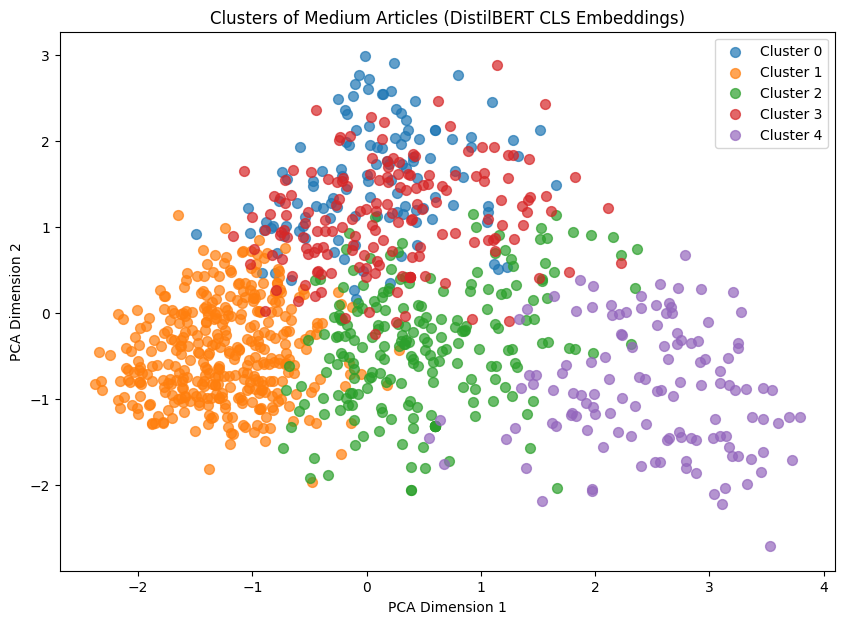

In [40]:
plt.figure(figsize=(10, 7))

palette = sns.color_palette("tab10", num_clusters)
for cluster_idx in range(num_clusters):
    cluster_points = reduced_embeddings[labels == cluster_idx]
    plt.scatter(
        cluster_points[:, 0], cluster_points[:, 1],
        s=50, label=f"Cluster {cluster_idx}", alpha=0.7, color=palette[cluster_idx]
    )

plt.title("Clusters of Medium Articles (DistilBERT CLS Embeddings)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend()
plt.show()

In [41]:
# clustered_articles = {i: [] for i in range(num_clusters)}
# for article, label in zip(articles, labels):
#     clustered_articles[label].append(article)

# for cluster_idx, articles in clustered_articles.items():
#     print(f"\nCluster {cluster_idx}:\n")
#     for article in articles[:3]: 
#         print(f"- {article}")

In [56]:
startup_articles = df[df.tags=="['Startup']"]['text']

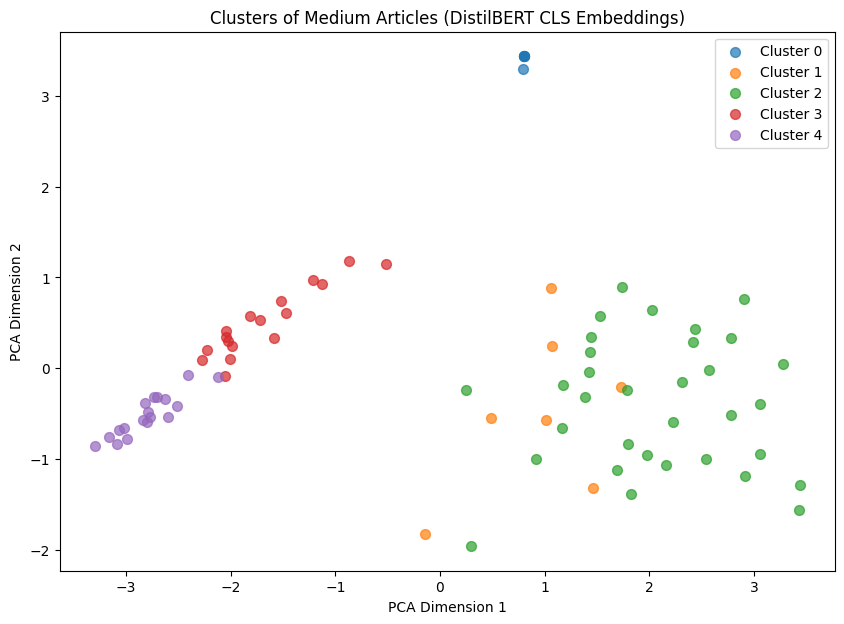

In [58]:
embeddings = get_cls_embeddings(startup_articles)
cluster_analysis(embeddings)